# Predicting house prices in King County, USA

This project aims to predict house prices in King County, USA using a multiple linear regression model.  
The goal is to have a model that is reliable in setting fair prices & expectations for both the seller & potential buyers.

### Data

The data set used to train the model [House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) which was published on kaggle.com under [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).  
It is a 2.52 MB tabular data set with 21 columns and 21612 rows. Most of the features are numeric with the exception of `date`. Some of the key features are `price`, `bedrooms`, `bathrooms`, `sqft_living`, `floors`.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("./kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Data cleaning

First I make sure all features use data formats that are supported.

Luckily the data model was already very clean. Most features are given in numeric types and there are no missing values. I merely needed to convert the type of `date` to a numeric and remove `id` as it has no no relavance for the prediction.

In [13]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [14]:
# change the date to a numeric type that is easier to work with
df["date"] = pd.to_datetime(df["date"])
df["date"] = df["date"].astype("int64")

# drop fields
df.drop(inplace=True, columns=['id'])

print(df.dtypes)

date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


I do not see any features that could be removed just from my insight into the problem.  
However, I assume that not all features will be relevant and I will look into this further as part of the exploratory data analysis.

### Exploratory Data Analysis (EDA)

#### Correlation analysis

Now I perform a correlation analysis to identify optimal features for our model:

<Axes: >

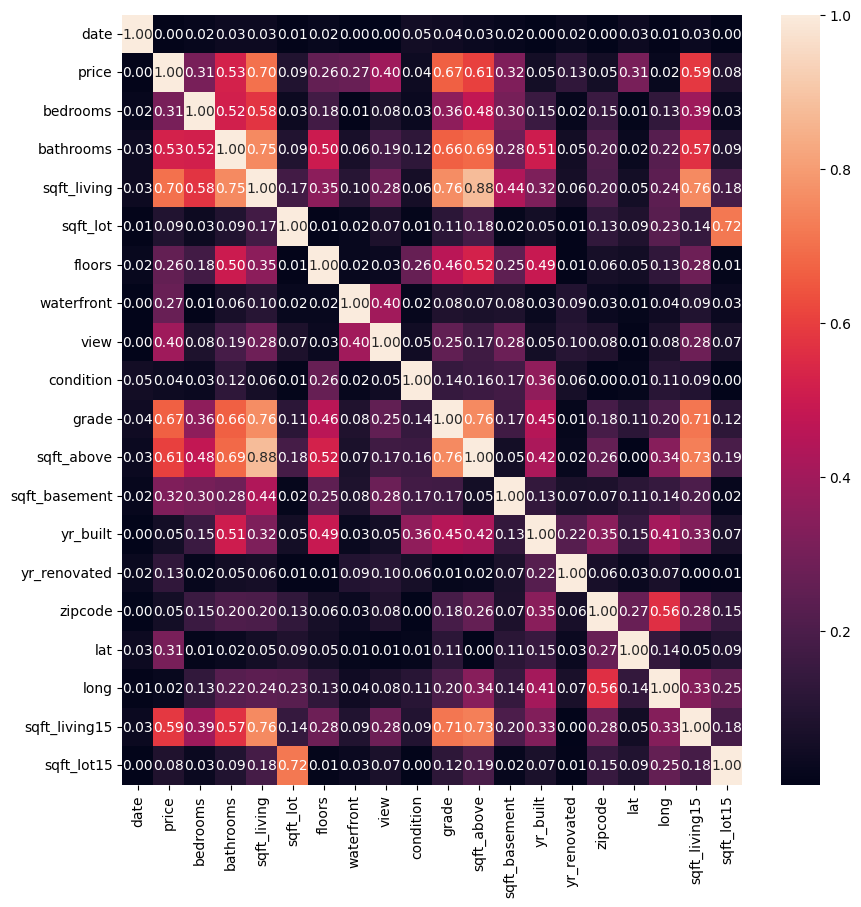

In [15]:
corr_matrix = df.corr(numeric_only=True).abs()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True)

The five features that correlate most with `price` are: `sqft_living` (0.7), `grade` (0.67), `sqft_above` (0.61), `sqft_living15` (0.59), `bathrooms` (0.53).

For now, I continue by dropping all features with correlation lower than 0.1:

In [16]:
# dropping all values with correlation lower than 0.1
corr = corr_matrix.abs()[['price']]
drop = list(corr[corr['price'] < 0.1].index)
print("dropping columns:", drop)

df.drop(drop, axis=1, inplace=True)
df

dropping columns: ['date', 'sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15']


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,0,47.5345,1410


For the remaining features, we will look at the pairplot:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

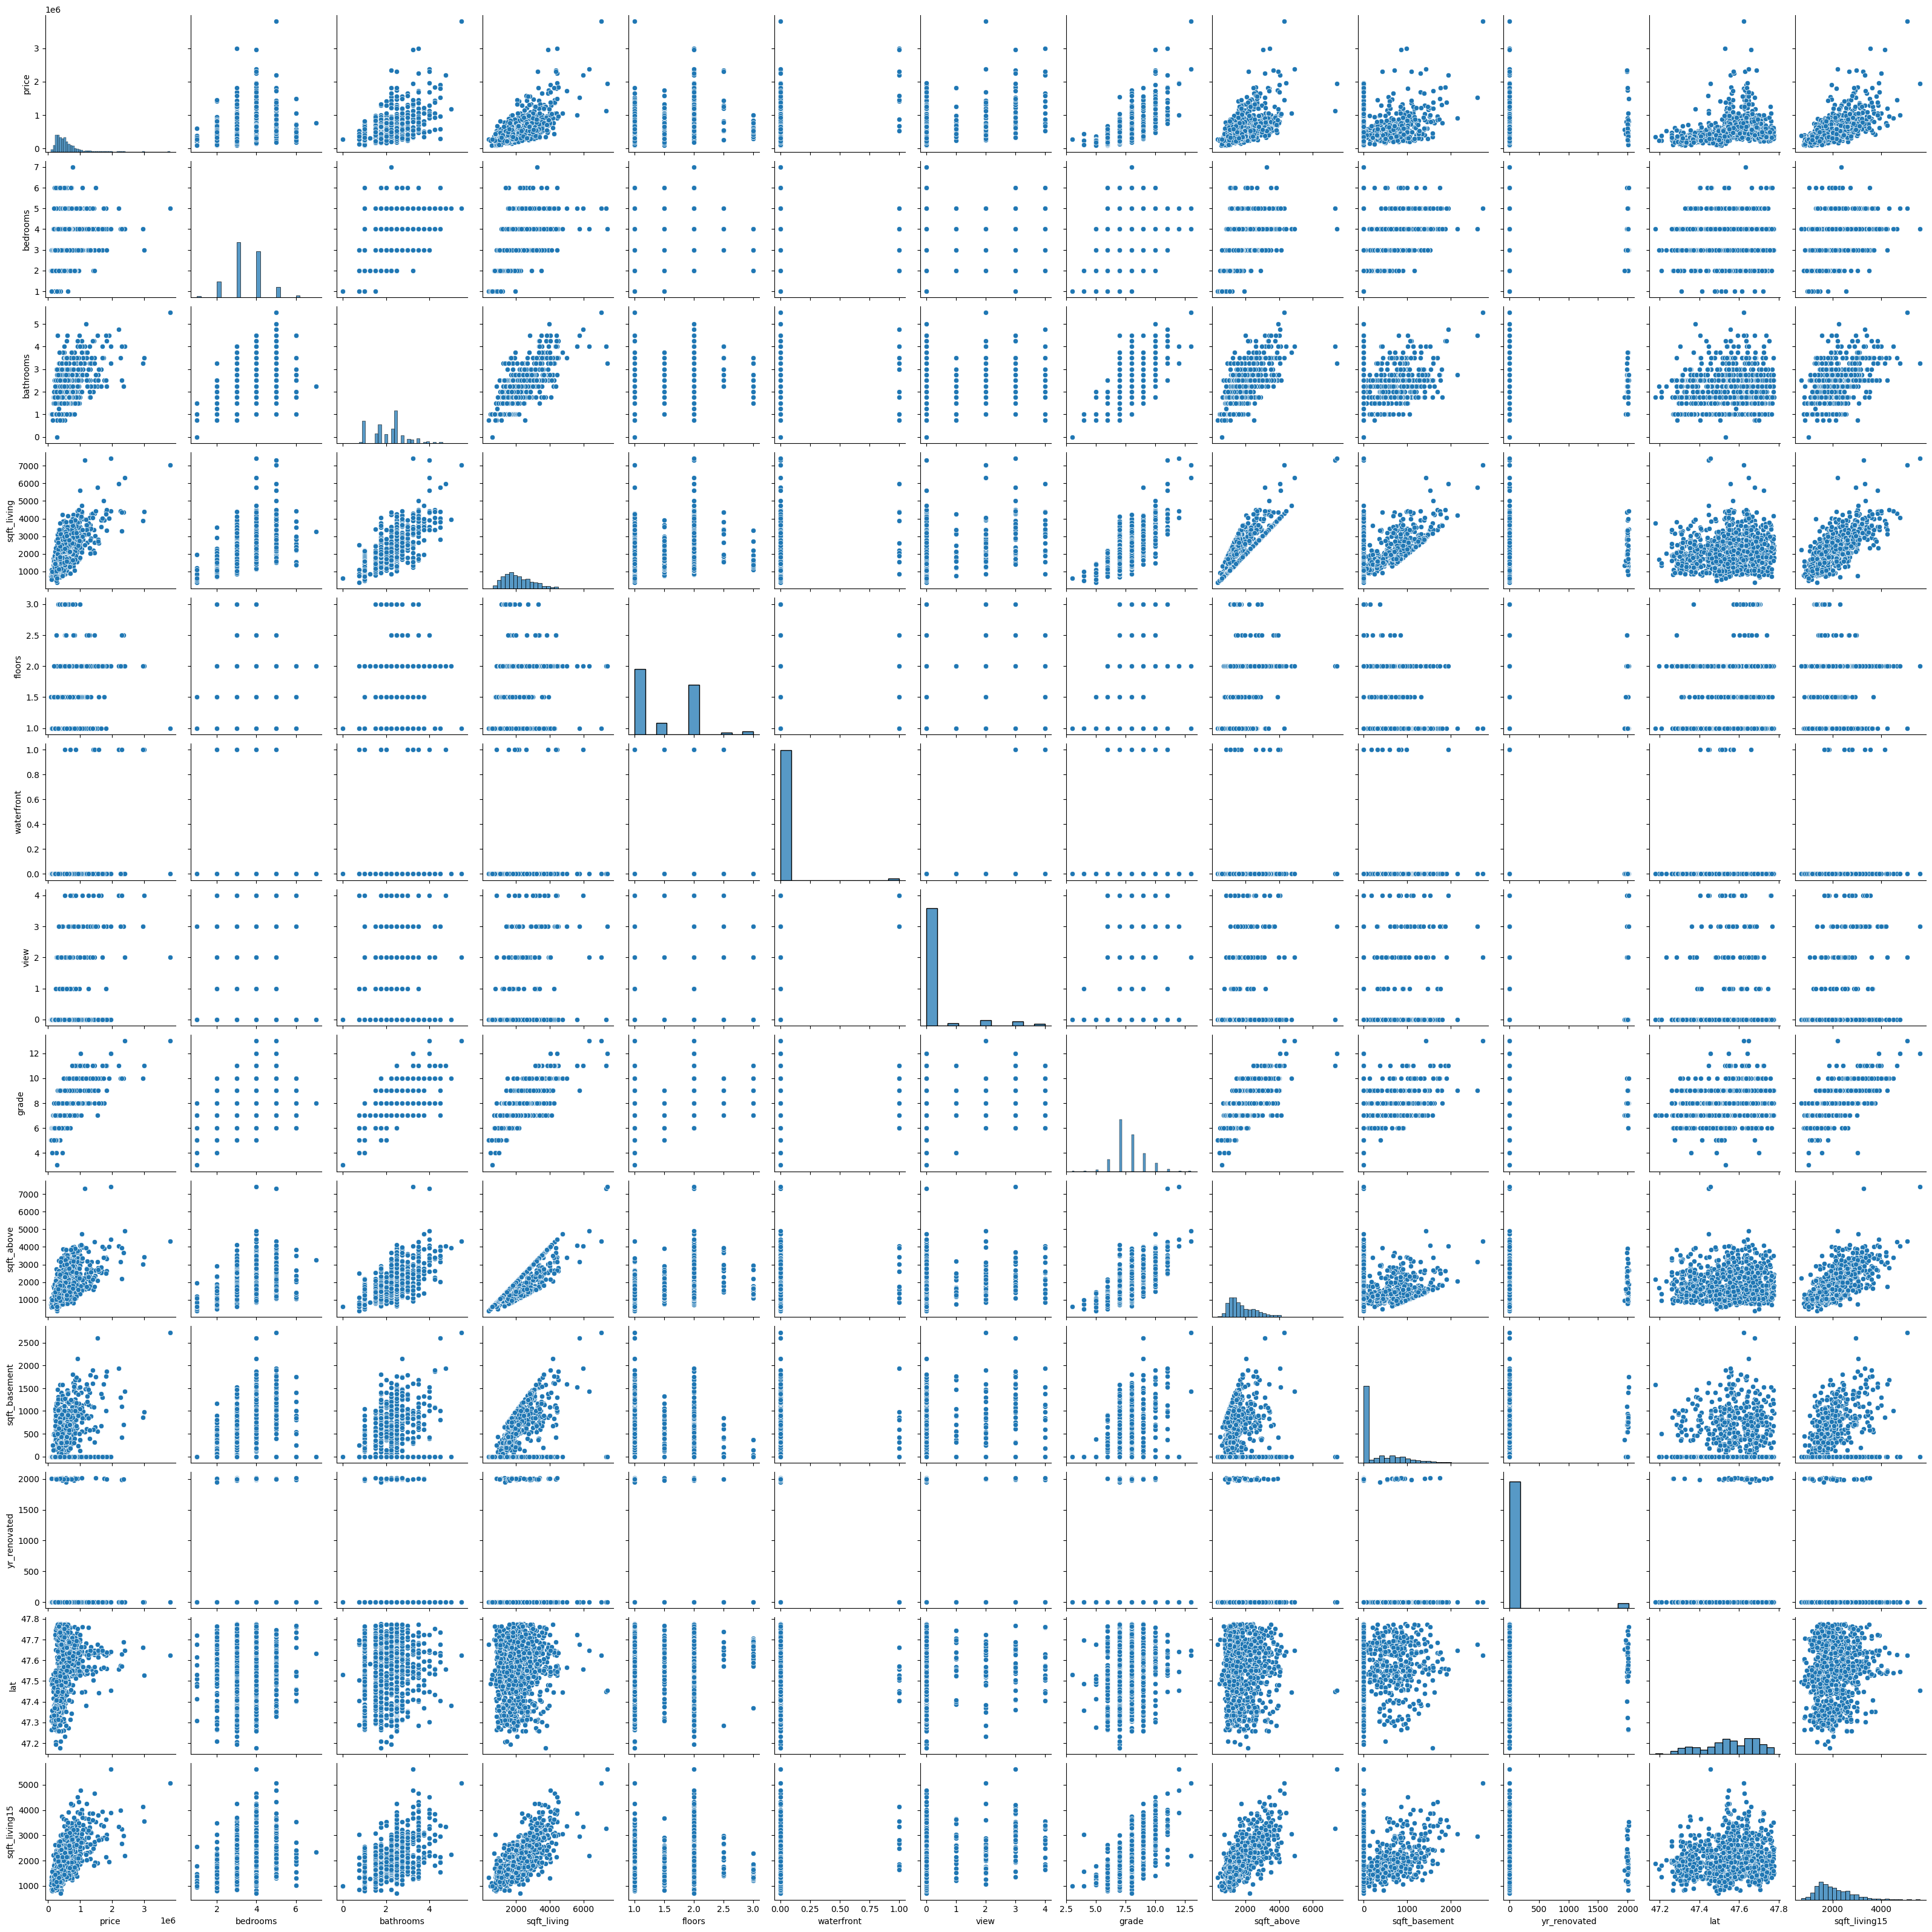

In [17]:
# uncomment to run (takes a while)
sns.pairplot(df.sample(1000))

### Models & Analysis

Now that we've finished the EDA, we train the model. However, we first need to split the cleaned data set into training & test sets so we can validate the model performance.


In [18]:
y = df['price']
X = df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define reusable functions for evaluating model performance including rendering of plots

def print_scores(model, X_test, y_test, y_pred):
    score = model.score(X_test, y_test)
    print("Score:", score)

    r2 = r2_score(y_test, y_pred)
    print("R-squared:", r2)
    
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
    
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)

def scatter_plot(y_test, y_pred):
    sns.lmplot(x='actual', y='predicted',
               data=pd.DataFrame({'actual': y_test, 'predicted': y_pred}),
               line_kws={'color': 'red', 'linestyle': '--'},
               ci=None)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price')

def residual_plot(y_test, y_pred):
    residuals = y_test - y_pred

    plt.figure(figsize=(6, 4))
    sns.residplot(x=y_pred, y=residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(0, color='red', linestyle='--')
    plt.show()

def evaluate(model, X_test, y_test, y_pred):
    print_scores(model, X_test, y_test, y_pred)
    scatter_plot(y_test, y_pred)
    residual_plot(y_test, y_pred)

Score: 0.658673727888305
R-squared: 0.658673727888305
Mean Squared Error (MSE): 47220213938.92069
Root Mean Squared Error (RMSE): 217302.1259420181
Mean Absolute Error (MAE): 134887.93837340878


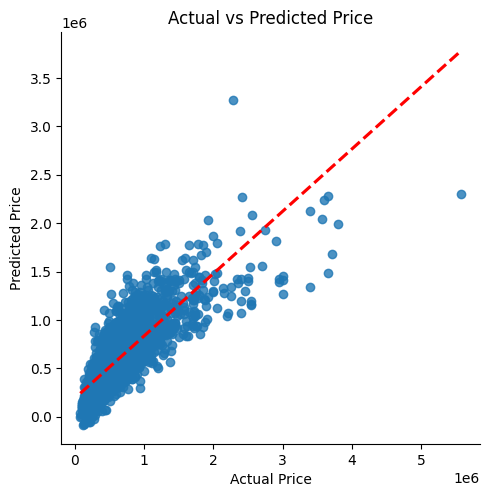

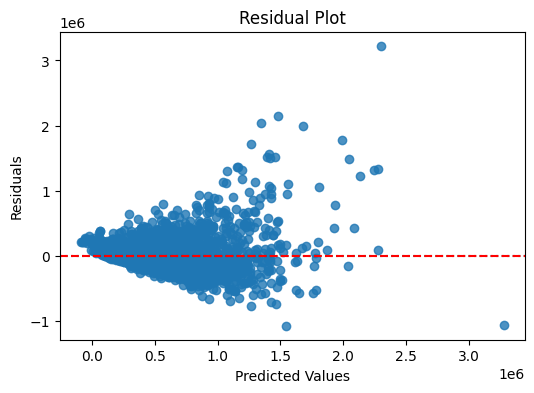

In [20]:
model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

evaluate(model, X_test, y_test, y_pred)

The resulting $r^2$ score is not bad for a start, but we can do better by introducing polynomial features:

Score: 0.7316647680344277
R-squared: 0.7316647680344277
Mean Squared Error (MSE): 37122390205.6325
Root Mean Squared Error (RMSE): 192671.71615375334
Mean Absolute Error (MAE): 115612.8196190689


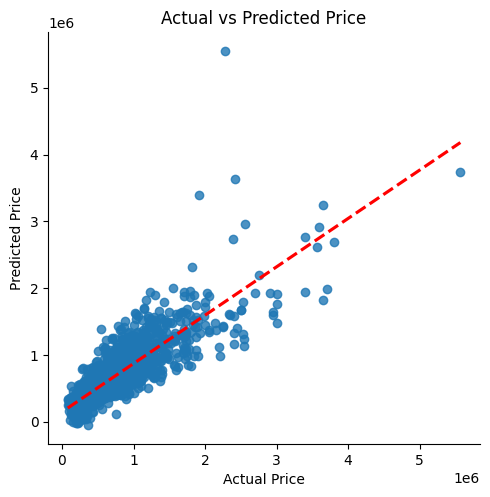

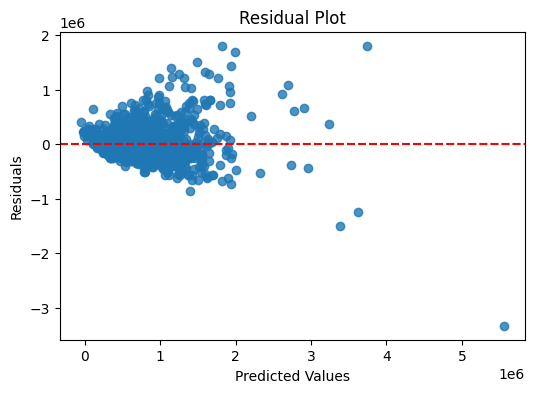

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

evaluate(model, X_test_poly, y_test, y_pred)

Now we get a better $r^2$ score.

To improve this even more, I decided to utilize an sklearn pipeline with added scaling, k-best feature selection and ridge regression in place of linear regression to incorporate L2 regularization:

Score: 0.7147554954571325
R-squared: 0.7147554954571325
Mean Squared Error (MSE): 39461675323.39254
Root Mean Squared Error (RMSE): 198649.62955765243
Mean Absolute Error (MAE): 118152.43317573756


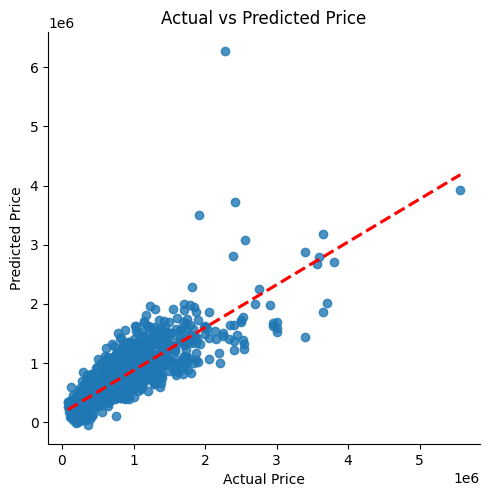

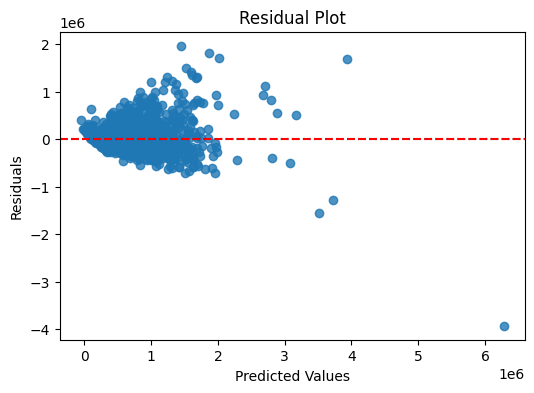

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression, Ridge

# Create a pipeline with a polynomial feature transformer and a linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest()),
    ('poly_features', PolynomialFeatures()),
    ('ridge_regression', Ridge())
])

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

evaluate(pipeline, X_test, y_test, y_pred)

To find the best hyperparameters for the pipeline, I am using a grid search:

Best hyperparameters: {'feature_selection__k': 12, 'poly_features__degree': 2}
Best R-squared score: 0.7529055584154554
Score: 0.7319423925027985
R-squared: 0.7319423925027985
Mean Squared Error (MSE): 37083982711.50659
Root Mean Squared Error (RMSE): 192572.01954465397
Mean Absolute Error (MAE): 115708.13803518047


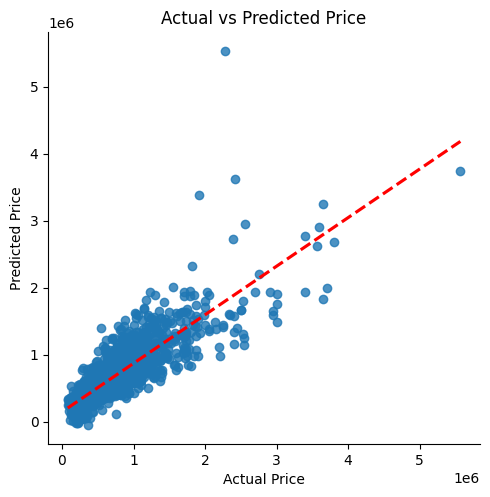

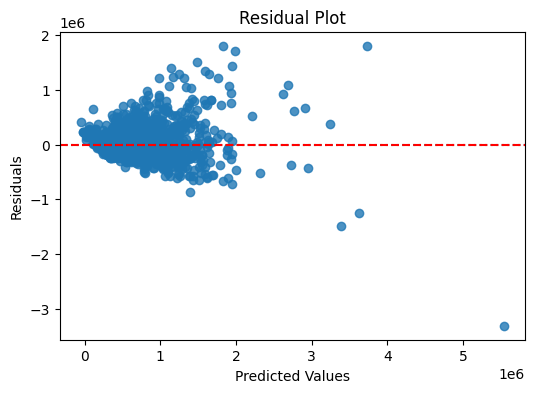

In [24]:
param_grid = {
    'feature_selection__k': [10, 11, 12],
    'poly_features__degree': [2, 3],
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best R-squared score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

evaluate(best_model, X_test, y_test, y_pred)

Lastly, I take the best values for hyperparameters `feature_selection__k` and `poly_features__degree` and use them for another grid search to find an optimal `ridge_regression__alpha` value.

Best hyperparameters: {'feature_selection__k': 12, 'poly_features__degree': 2, 'ridge_regression__alpha': 100.0}
Best R-squared score: 0.7534085038841098
Score: 0.7313290166342514
R-squared: 0.7313290166342514
Mean Squared Error (MSE): 37168839173.209854
Root Mean Squared Error (RMSE): 192792.2176157789
Mean Absolute Error (MAE): 115735.90918643014


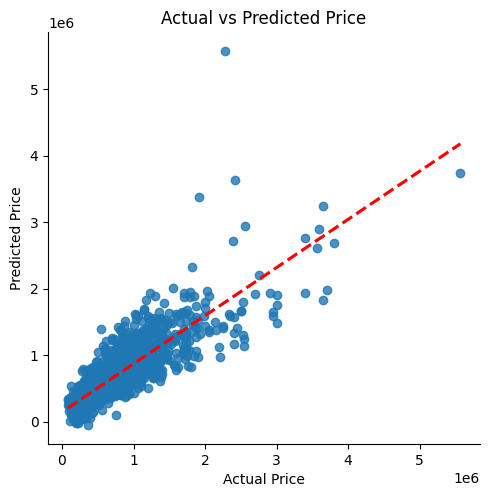

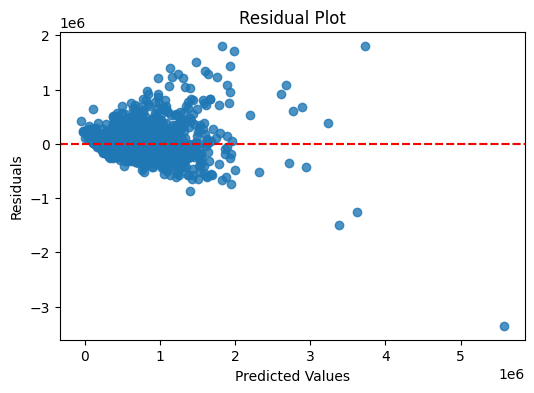

In [25]:
param_grid = {
    'feature_selection__k': [12],
    'poly_features__degree': [2],
    'ridge_regression__alpha': np.logspace(-4, 2, 100)
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best R-squared score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

evaluate(best_model, X_test, y_test, y_pred)

### Summary of results

The initial, basic linear regression model scored an $r^2$ value of 66 % and provided a good foundation.

The second model using polynomial regression with 2 degrees has improved over this a lot and reached an $r^2$ value of 73 %.

The final model further improved on this by utilizing feature scaling, feature selection, polynomials, L2 regularization via ridge regression and hyperparameter optimization using grid search.
It uses 2 degrees of polynomials and provides an $r^2$ value of 73 %.

### Discussion and Conclusion

To my surprise the second model that uses polynomial regression without feature scaling & hyperparameter optimization already provided really good results. The difference in $r^2$ and the other scores compared to the final model are almost negligible. For simplicity sake it might even be better to use the second model.

Either way, both models archieved good performance metrics and a strong fit to the data and should be very helpful for home sellers & buyers in King County, USA.